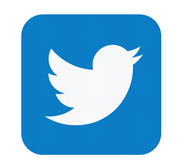  
# WeRateDogs Twitter Data: Analyses Report

**This report analyse and visualise twitter data which are collected from various sources in variety of formats, which were assessed for it's quality and tidiness, cleaned and combined for analysis purposes. This project tries to analyse the relationships between tweeter variables observed, presents plots to visualise and uncover insights**

# Visualisations

**01. On average, what stage of dogs life has a highest favorite counts?**  
There have been four types of dogs stages of life given in the dataframe namely doggo, pupper, floofer and puppo. The chart below tries to visualise the dogs stages and its average favourite counts received from tweets.

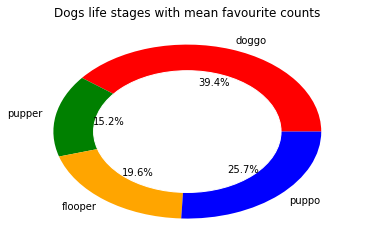

In [22]:
# create deffernt data for dog's life stage
d1 = twitter_archive_master[twitter_archive_master.stage=='doggo']
d2 = twitter_archive_master[twitter_archive_master.stage=='pupper']
d3 = twitter_archive_master[twitter_archive_master.stage=='floofer']
d4 = twitter_archive_master[twitter_archive_master.stage=='puppo']

#Find the mean favorite for above data
d = d1.favorite_count.mean()
pup = d2.favorite_count.mean()
f = d3.favorite_count.mean()
p = d4.favorite_count.mean()

size_of_groups=[d,pup,f,p]
names = 'doggo','pupper','flooper','puppo'

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
 
plt.pie(size_of_groups, labels=names, autopct='%1.1f%%', colors=['red','green','orange','blue'])
plt.title('Dogs life stages with mean favourite counts')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

*It is apparent from the chart, that doggo has comparitively higher favorite counts of 39.4% whereas pupper has a least of 15.2%. Doggo is big usually older and pupper is small dogs usually younger!!*

**02. Correlations between Favorites, Retweets and Ratings**  
The scatterplots below visualise the strength of relationship between Favourite count, Retweet and Ratings

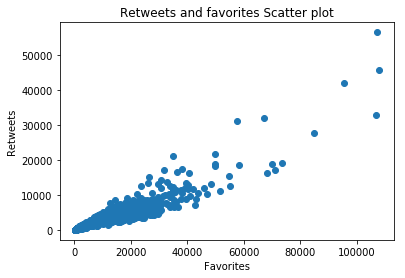

In [23]:
#Plot Scatterplot to find relationship between favorites and tweets
plt.scatter(twitter_archive_master.favorite_count, twitter_archive_master.retweet_count)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot');


In [24]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])

0.92166979420903705

*It is obvious that Retweet and Favorites has a strong positive correlation of 92% from the above graphs which is expected!*

In [25]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['rating_numerator'])

0.0096183752190123397

*Favorites and Rating have a very poor positive correletion of 0.09% which shows sentiments of tweeters largely affect the ratings no matter the favorite counts.*

In [26]:
twitter_archive_master['retweet_count'].corr(twitter_archive_master['rating_numerator'])

0.014557301848946385

*Retweets and ratings have a very poor positive correlation of 1%, this is again reflects how sentiment of dog owners influence the ratings!*

**03. What are the most common predicted breeds of dogs?**  
Udacity has modeled a neural network that classify breeds of dogs from the image in the WeRateDogs Twitter archive. The bar plot below tries to visualise the most common dogs breed classified accurately at the first level of predictions.

In [27]:
#Create a dataset p1 holds the most predicted dogs breed data
dog_name = ["Labrador_retriever","Pembroke","Chihuahua","Pug"]
p1 = twitter_archive_master.query('pred1_dog_breed =="Golden_retriever"')

for name in dog_name:
    
    p1 = p1.append(twitter_archive_master[twitter_archive_master['pred1_dog_breed'] == name])


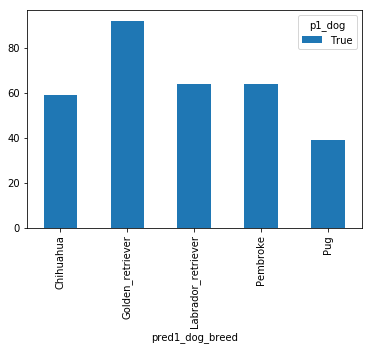

In [28]:
p1.groupby(['pred1_dog_breed','p1_dog']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

*Labrador retriever, Pembroke, Chihuahua,Pug and Golden retriever are the most commonly predicted breeds. Among them Golden retriever have the highest number of predictions counts. Also the plot proves that all of the dog breeds seem to be true at the first prediction!*

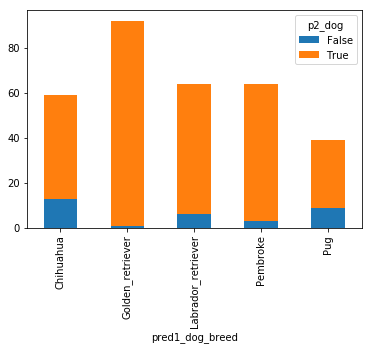

In [29]:
p1.groupby(['pred1_dog_breed','p2_dog']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

*Above bar plot visualise whether or not the prediction 2 is True. For instance, about 99% of  Golden retriever has been predicted correctly in its second prediction.*

**04. What is the most common use of twitter platform?**  
There are four types of tweet platforms identified in the data, below a visualise of their proportion. 

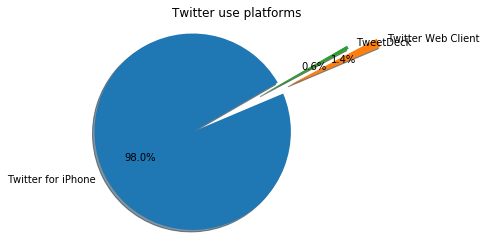

In [30]:
#Plot  pie chart 
labels = 'Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'
sizes = [1932, 28, 11]
explode = (0.3, 0.8, 0.5)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Twitter use platforms")
plt.show()

*iPhone is the most common used of twitter platform with a 98%, other platforms are significantly smaller than iPhone.*

# Insights
**1 What type of dog recieved highest number of favorites count?**

In [31]:
max_fav = twitter_archive_master.favorite_count.max()
d = twitter_archive_master.loc[twitter_archive_master.favorite_count==max_fav]
d

,tweet_id,tweet_time,source,tweets,jpg_url,rating_numerator,rating_denominator,name,stage,favorite_count,...,img_num,pred1_dog_breed,p1_conf,p1_dog,pred2_dog_breed,p2_conf,p2_dog,pred3_dog_breed,p3_conf,p3_dog
46,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13.0,10,Duddles,NaN,107956,...,1,English_springer,0.383404,True,Boston_bull,0.134967,True,Cardigan,0.110481,True


*It is a puppo with 107956 favorite count and 13 ratings. It is predicted as English_springer breed with 38.4% confidence level at the first attempt.*


**2. What type of dogs stage in life cycle have encounted most in this tweets set?**

In [32]:
#Finding value_counts of dogs life stages
twitter_archive_master.stage.value_counts()

pupper           117
doggo             36
puppo             15
floofer            5
doggo, pupper      4
Name: stage, dtype: int64

*Though there are significant number of None entries, it can be concluded pupper is the most appeared dog stage.*

**3. Which dog recieved a highest rating?**

In [33]:
#Extracting the rows with maximum ratings
max_fav = twitter_archive_master.rating_numerator.max()
d = twitter_archive_master.loc[twitter_archive_master.rating_numerator==max_fav]
d

,tweet_id,tweet_time,source,tweets,jpg_url,rating_numerator,rating_denominator,name,stage,favorite_count,...,img_num,pred1_dog_breed,p1_conf,p1_dog,pred2_dog_breed,p2_conf,p2_dog,pred3_dog_breed,p3_conf,p3_dog
576,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,NaN,5569,...,1,Bow_tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False


*It is called Atticus with ratings of 1776*

**4. What are the common dog name?**

In [34]:
#Value counts for dog names
(twitter_archive_master.name.value_counts()).head()

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Tucker      9
Name: name, dtype: int64

*Most common dogs names are Charlie, Lucy, Cooper, Oliver*

## Conclusion
It is apparent that twitter handle of WeRateDogs gives a lot of interesting insights about how the sentiments of the people work when it comes to different breeds of dogs within their different life stages. It's also shown that having higher ratings and retweet doesn't influence the favorite count. Though pupper stage has a highest number of entires and highest favorite count, on average doggo is the most favorite stage!

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'act_report.ipynb'])

0